In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def remove_collinear_features(x, threshold):
    """
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.

    Inputs:
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output:
        dataframe that contains only the non-highly-collinear features
    """

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i + 1):
            item = corr_matrix.iloc[j : (j + 1), (i + 1) : (i + 2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print("Removed Columns {}".format(drops))
    return x

# aids

In [23]:
aids = pd.read_csv(
    "https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/aids.csv?token=GHSAT0AAAAAACIBN357PEUWXRFLYLR5F5UMZPZS3JA"
)

In [13]:
# one distinct value in the column zprior
aids = aids.drop(columns=["zprior"])

In [14]:
# raname column cid to target
aids = aids.rename(columns={"cid": "target"})

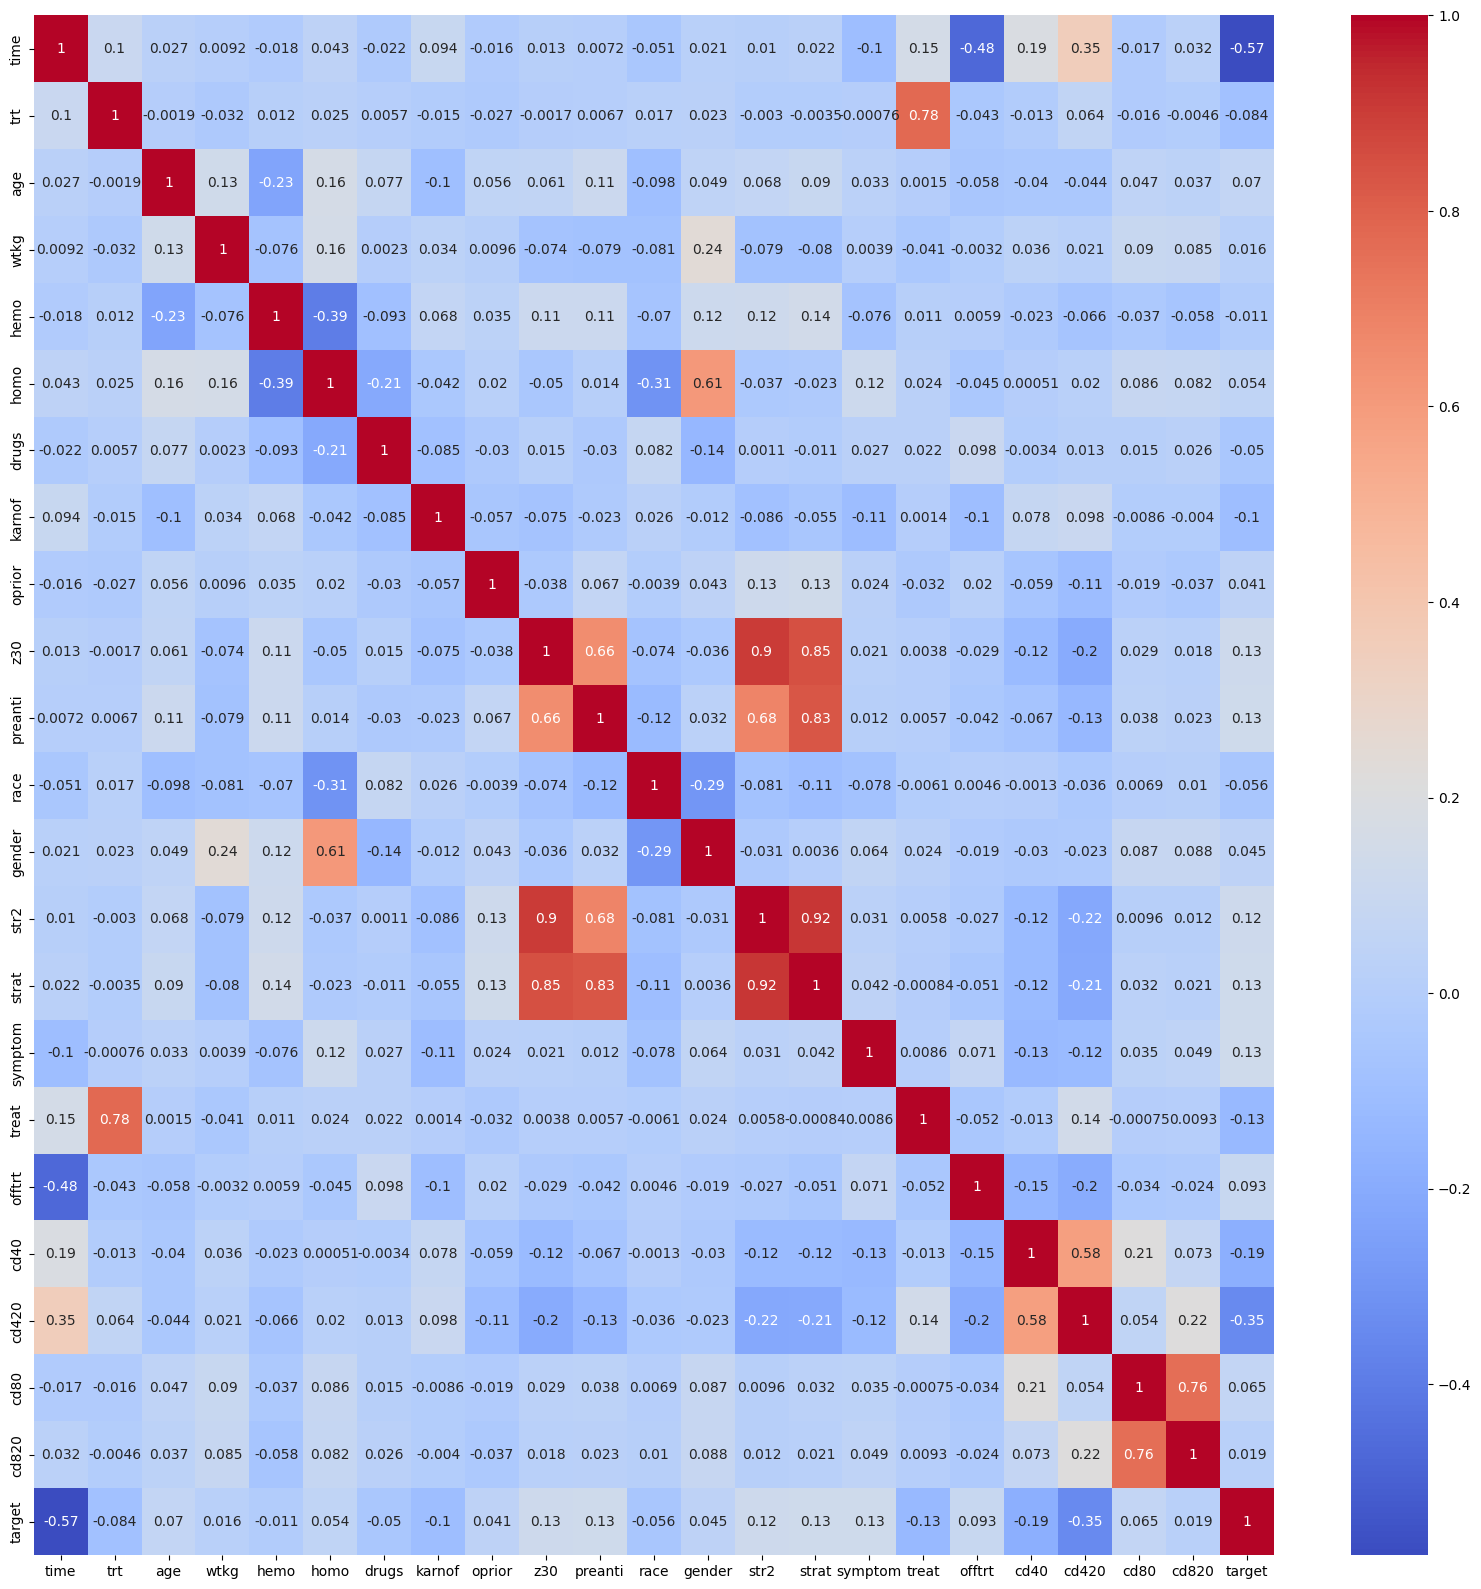

In [18]:
# make corr heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(aids.corr(), annot=True, cmap="coolwarm")
plt.show()


In [19]:
aids = remove_collinear_features(aids, 0.8)

Removed Columns {'strat', 'str2'}


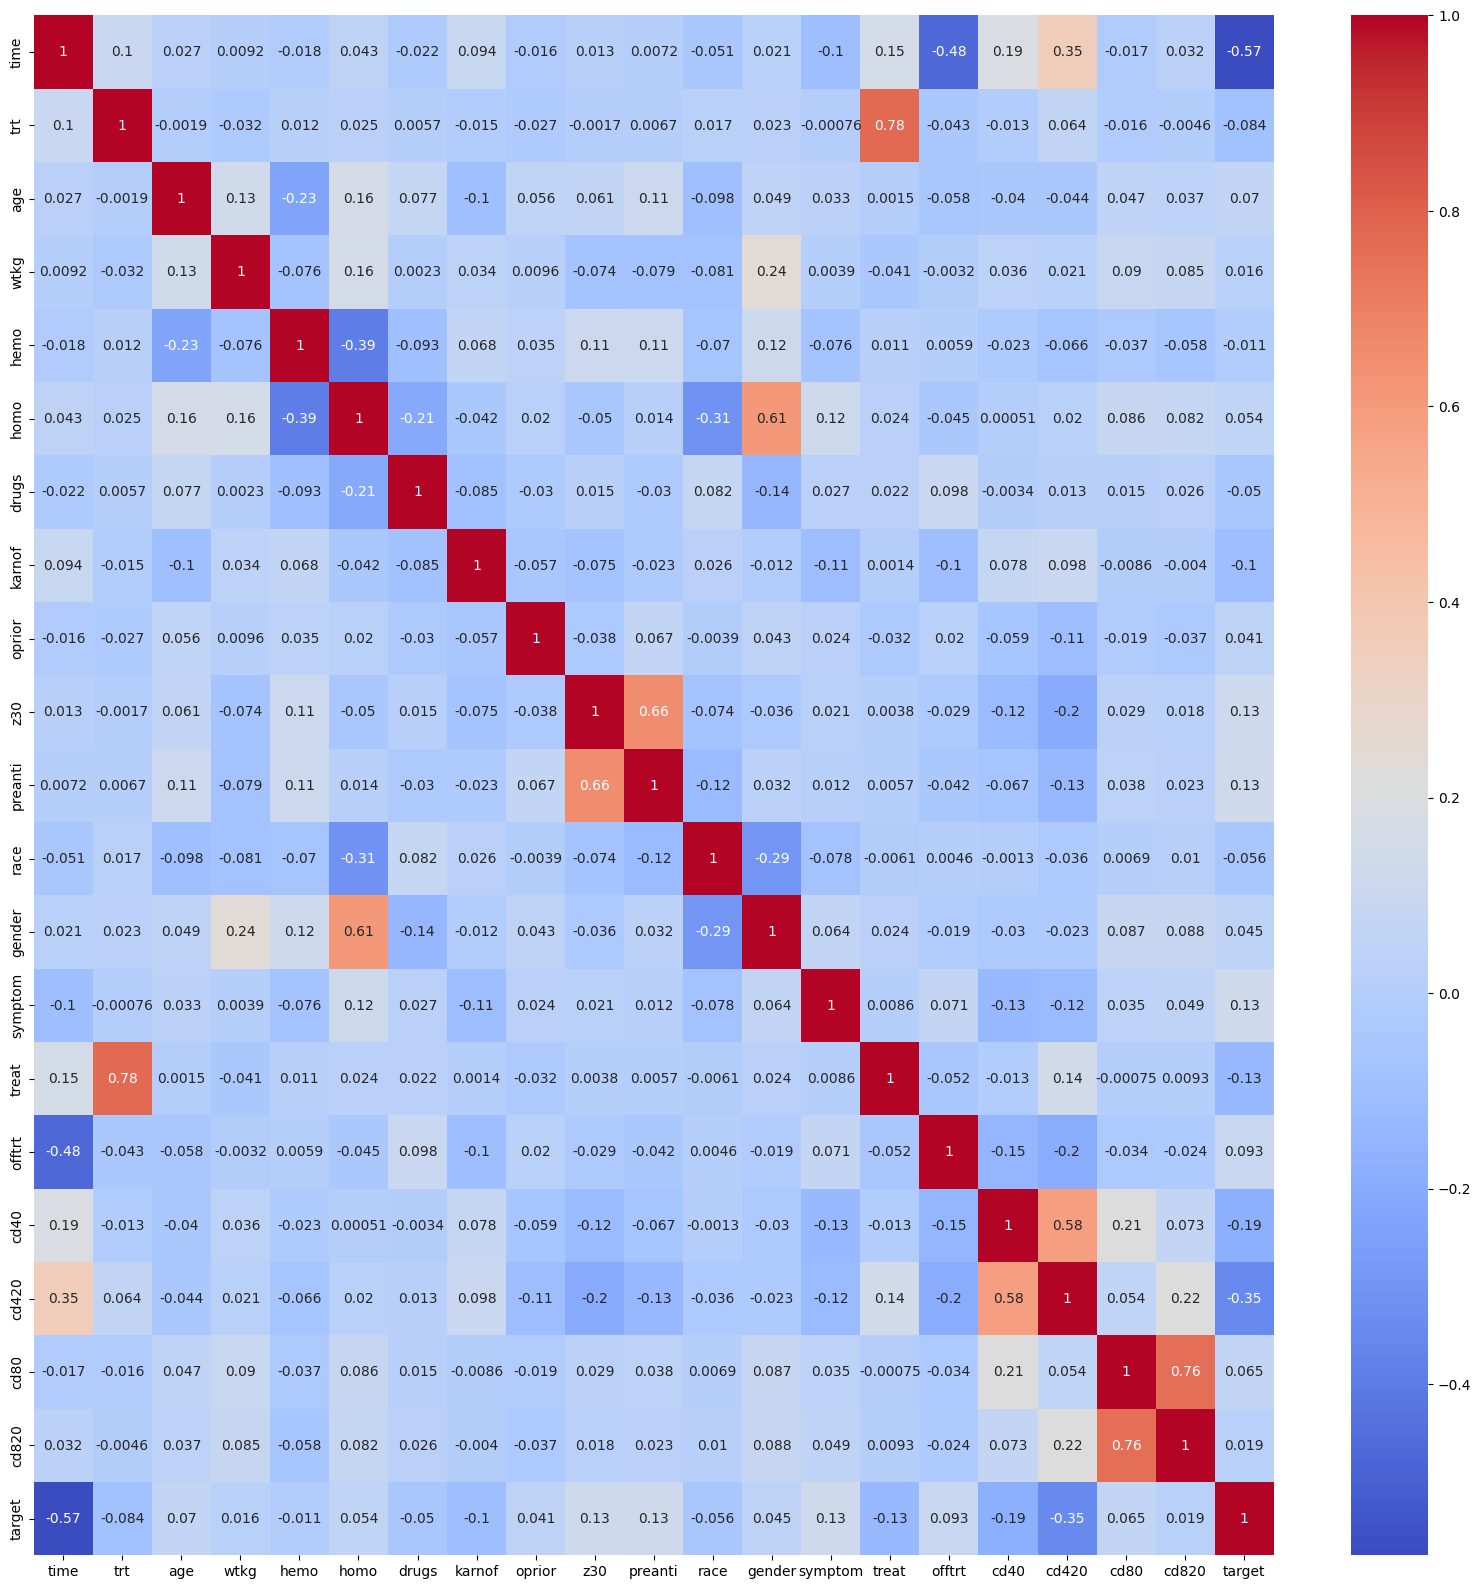

In [20]:
# make corr heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(aids.corr(), annot=True, cmap="coolwarm")
plt.show()

In [22]:
aids.to_csv("data/aids.csv", index=False)

# blood

In [19]:
blood = pd.read_csv("https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/blood.csv?token=GHSAT0AAAAAACIBN357UVLNV4V2V3RXOS46ZPZTAOQ")

In [24]:
blood = blood.rename(columns={"y": "target"})

V1    V2       V3    V4  target
0     2.0  50.0  12500.0  98.0       1
1     0.0  13.0   3250.0  28.0       1
2     1.0  16.0   4000.0  35.0       1
3     2.0  20.0   5000.0  45.0       1
4     1.0  24.0   6000.0  77.0       0
..    ...   ...      ...   ...     ...
743  23.0   2.0    500.0  38.0       0
744  21.0   2.0    500.0  52.0       0
745  23.0   3.0    750.0  62.0       0
746  39.0   1.0    250.0  39.0       0
747  72.0   1.0    250.0  72.0       0

[748 rows x 5 columns]

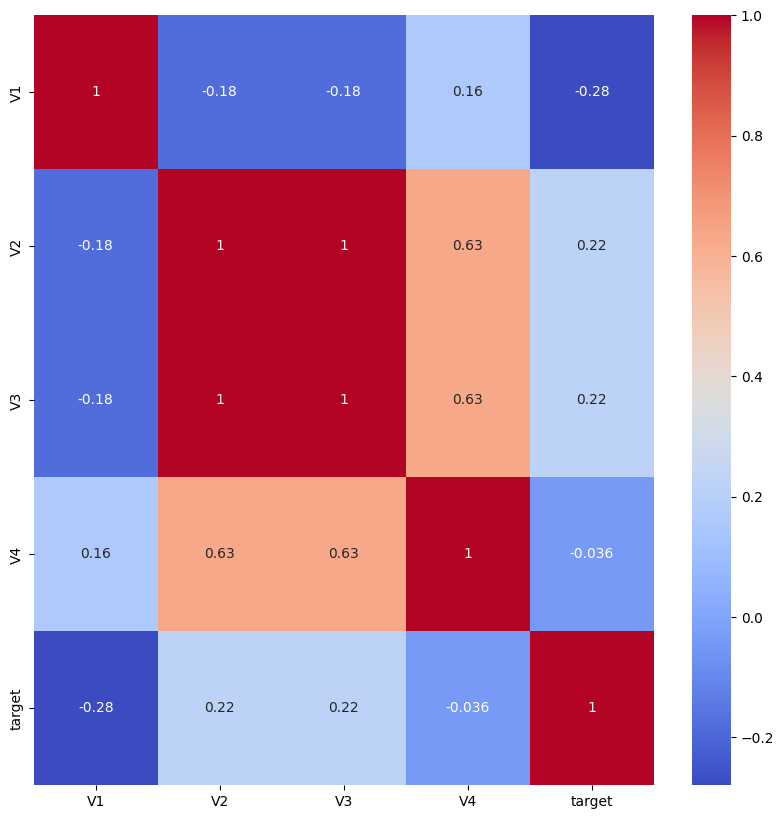

In [26]:
# make corr heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(blood.corr(), annot=True, cmap="coolwarm")
plt.show()

In [27]:
# values v2 and v3 have correlation of 1
blood.drop(columns=["V2"], inplace=True)

In [28]:
blood.to_csv("data/blood.csv", index=False)

# campaign

In [30]:
campaign = pd.read_csv(
    "https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/campaign.csv?token=GHSAT0AAAAAACIBN3575APUJ2QSYTUNSL3YZPZTGIQ"
)

In [32]:
campaign.rename(columns={"Response": "target"}, inplace=True)

In [38]:
# only one distinct value in Z_CostContact and Z_Revenue
campaign.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

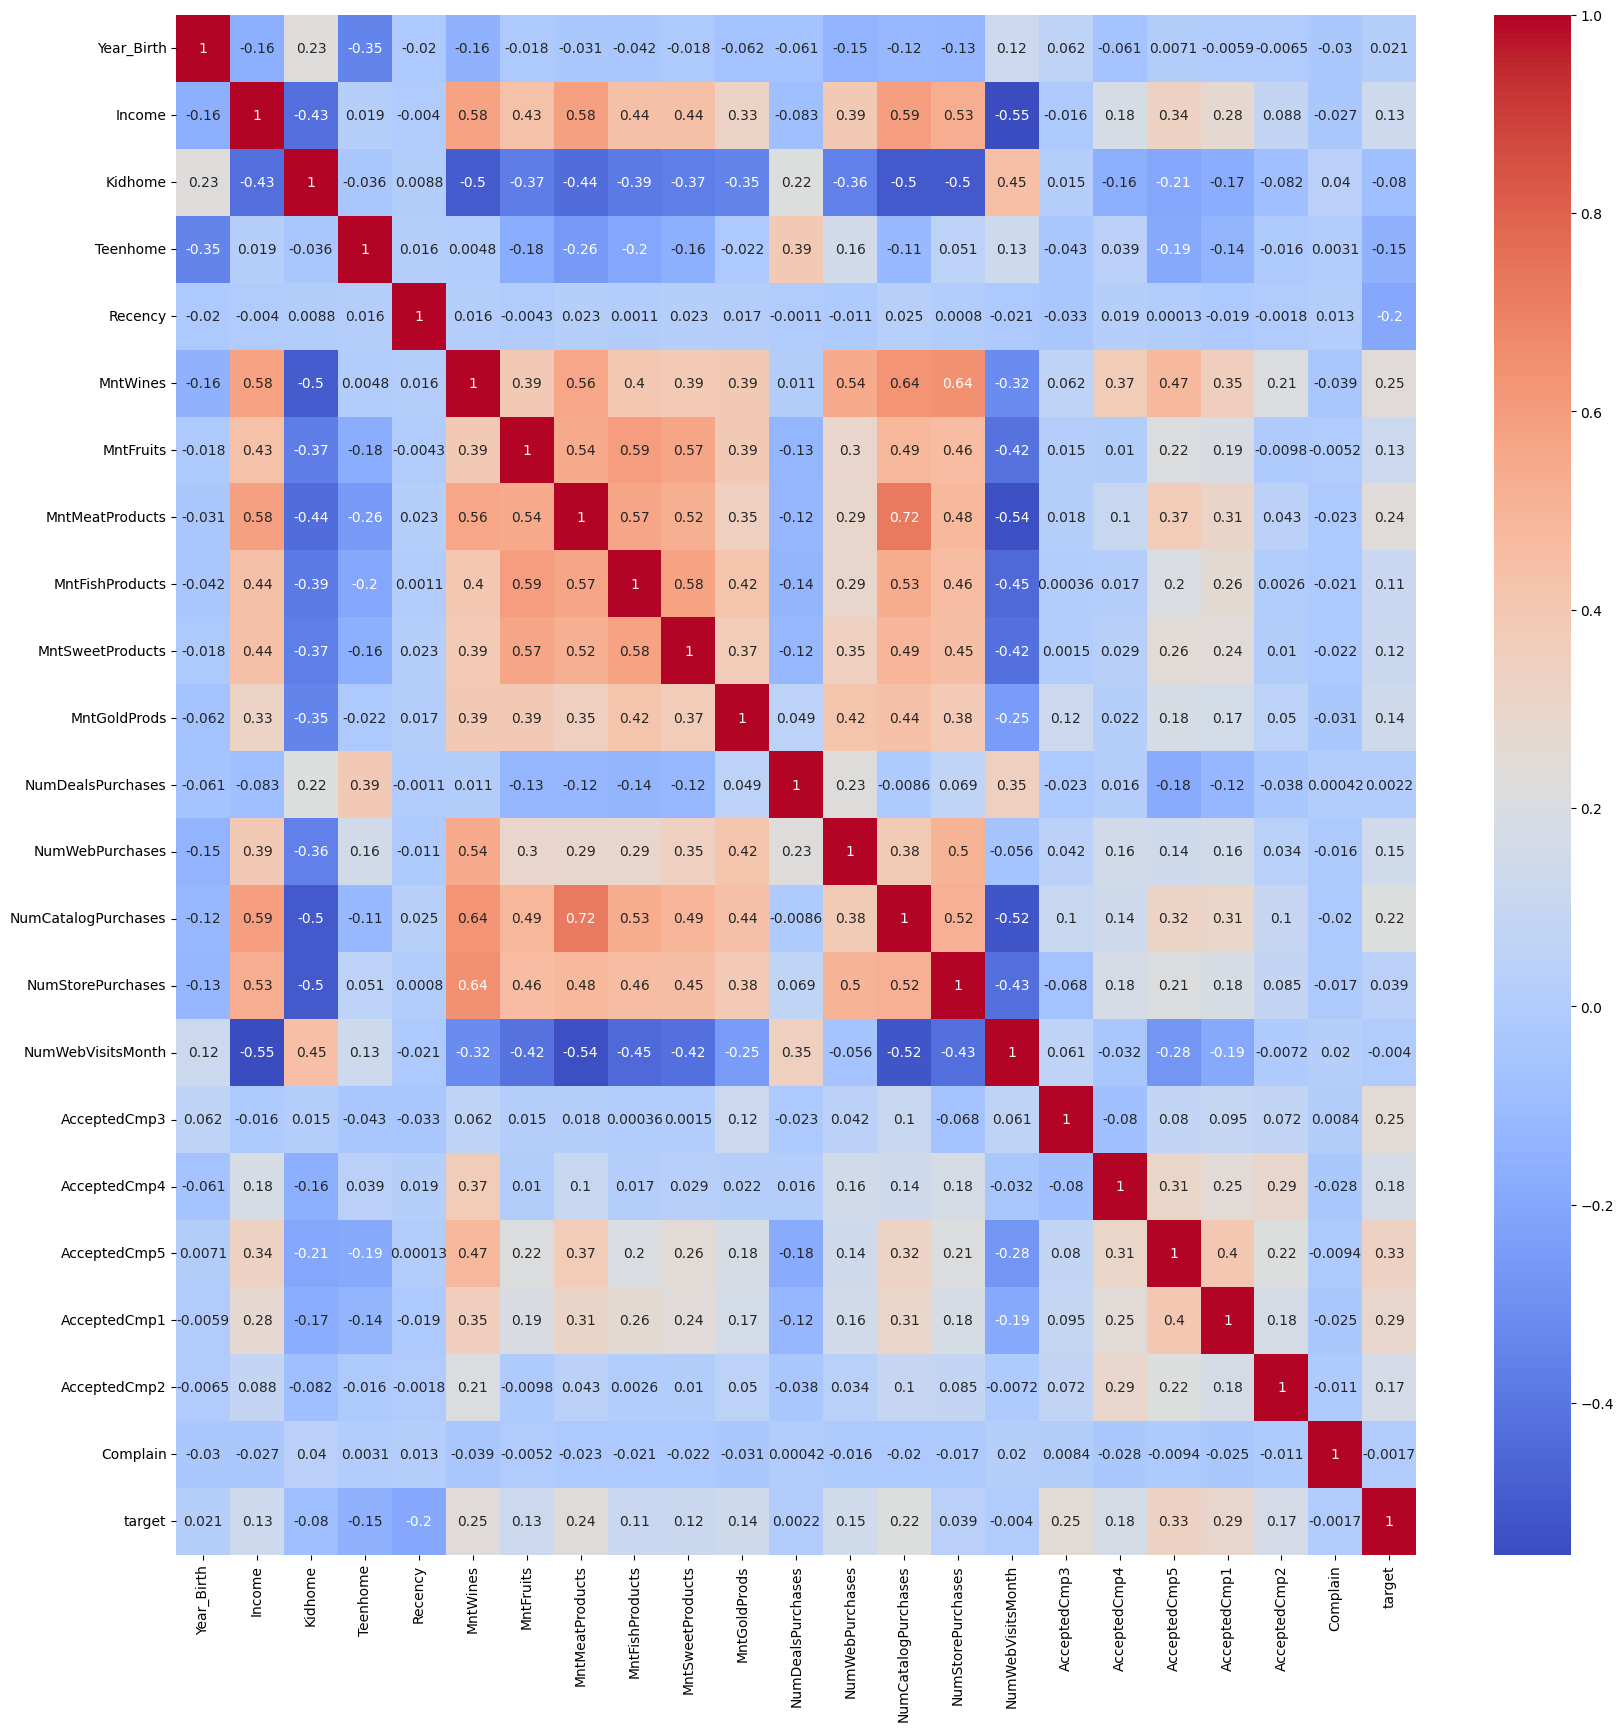

In [39]:
# make corr heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(campaign.corr(), annot=True, cmap="coolwarm")
plt.show()

In [40]:
campaign.to_csv("data/campaign.csv", index=False)

# communities and crime 

In [3]:
communities = pd.read_csv("https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/communities_and_crime.csv?token=GHSAT0AAAAAACIBN357PQJRY7PLI3UQWLGYZPZTP3Q")

In [5]:
communities.rename(columns={"target_ViolentCrimesPerPop": "target"}, inplace=True)
communities.drop(columns=["state", "communityname"], inplace=True)

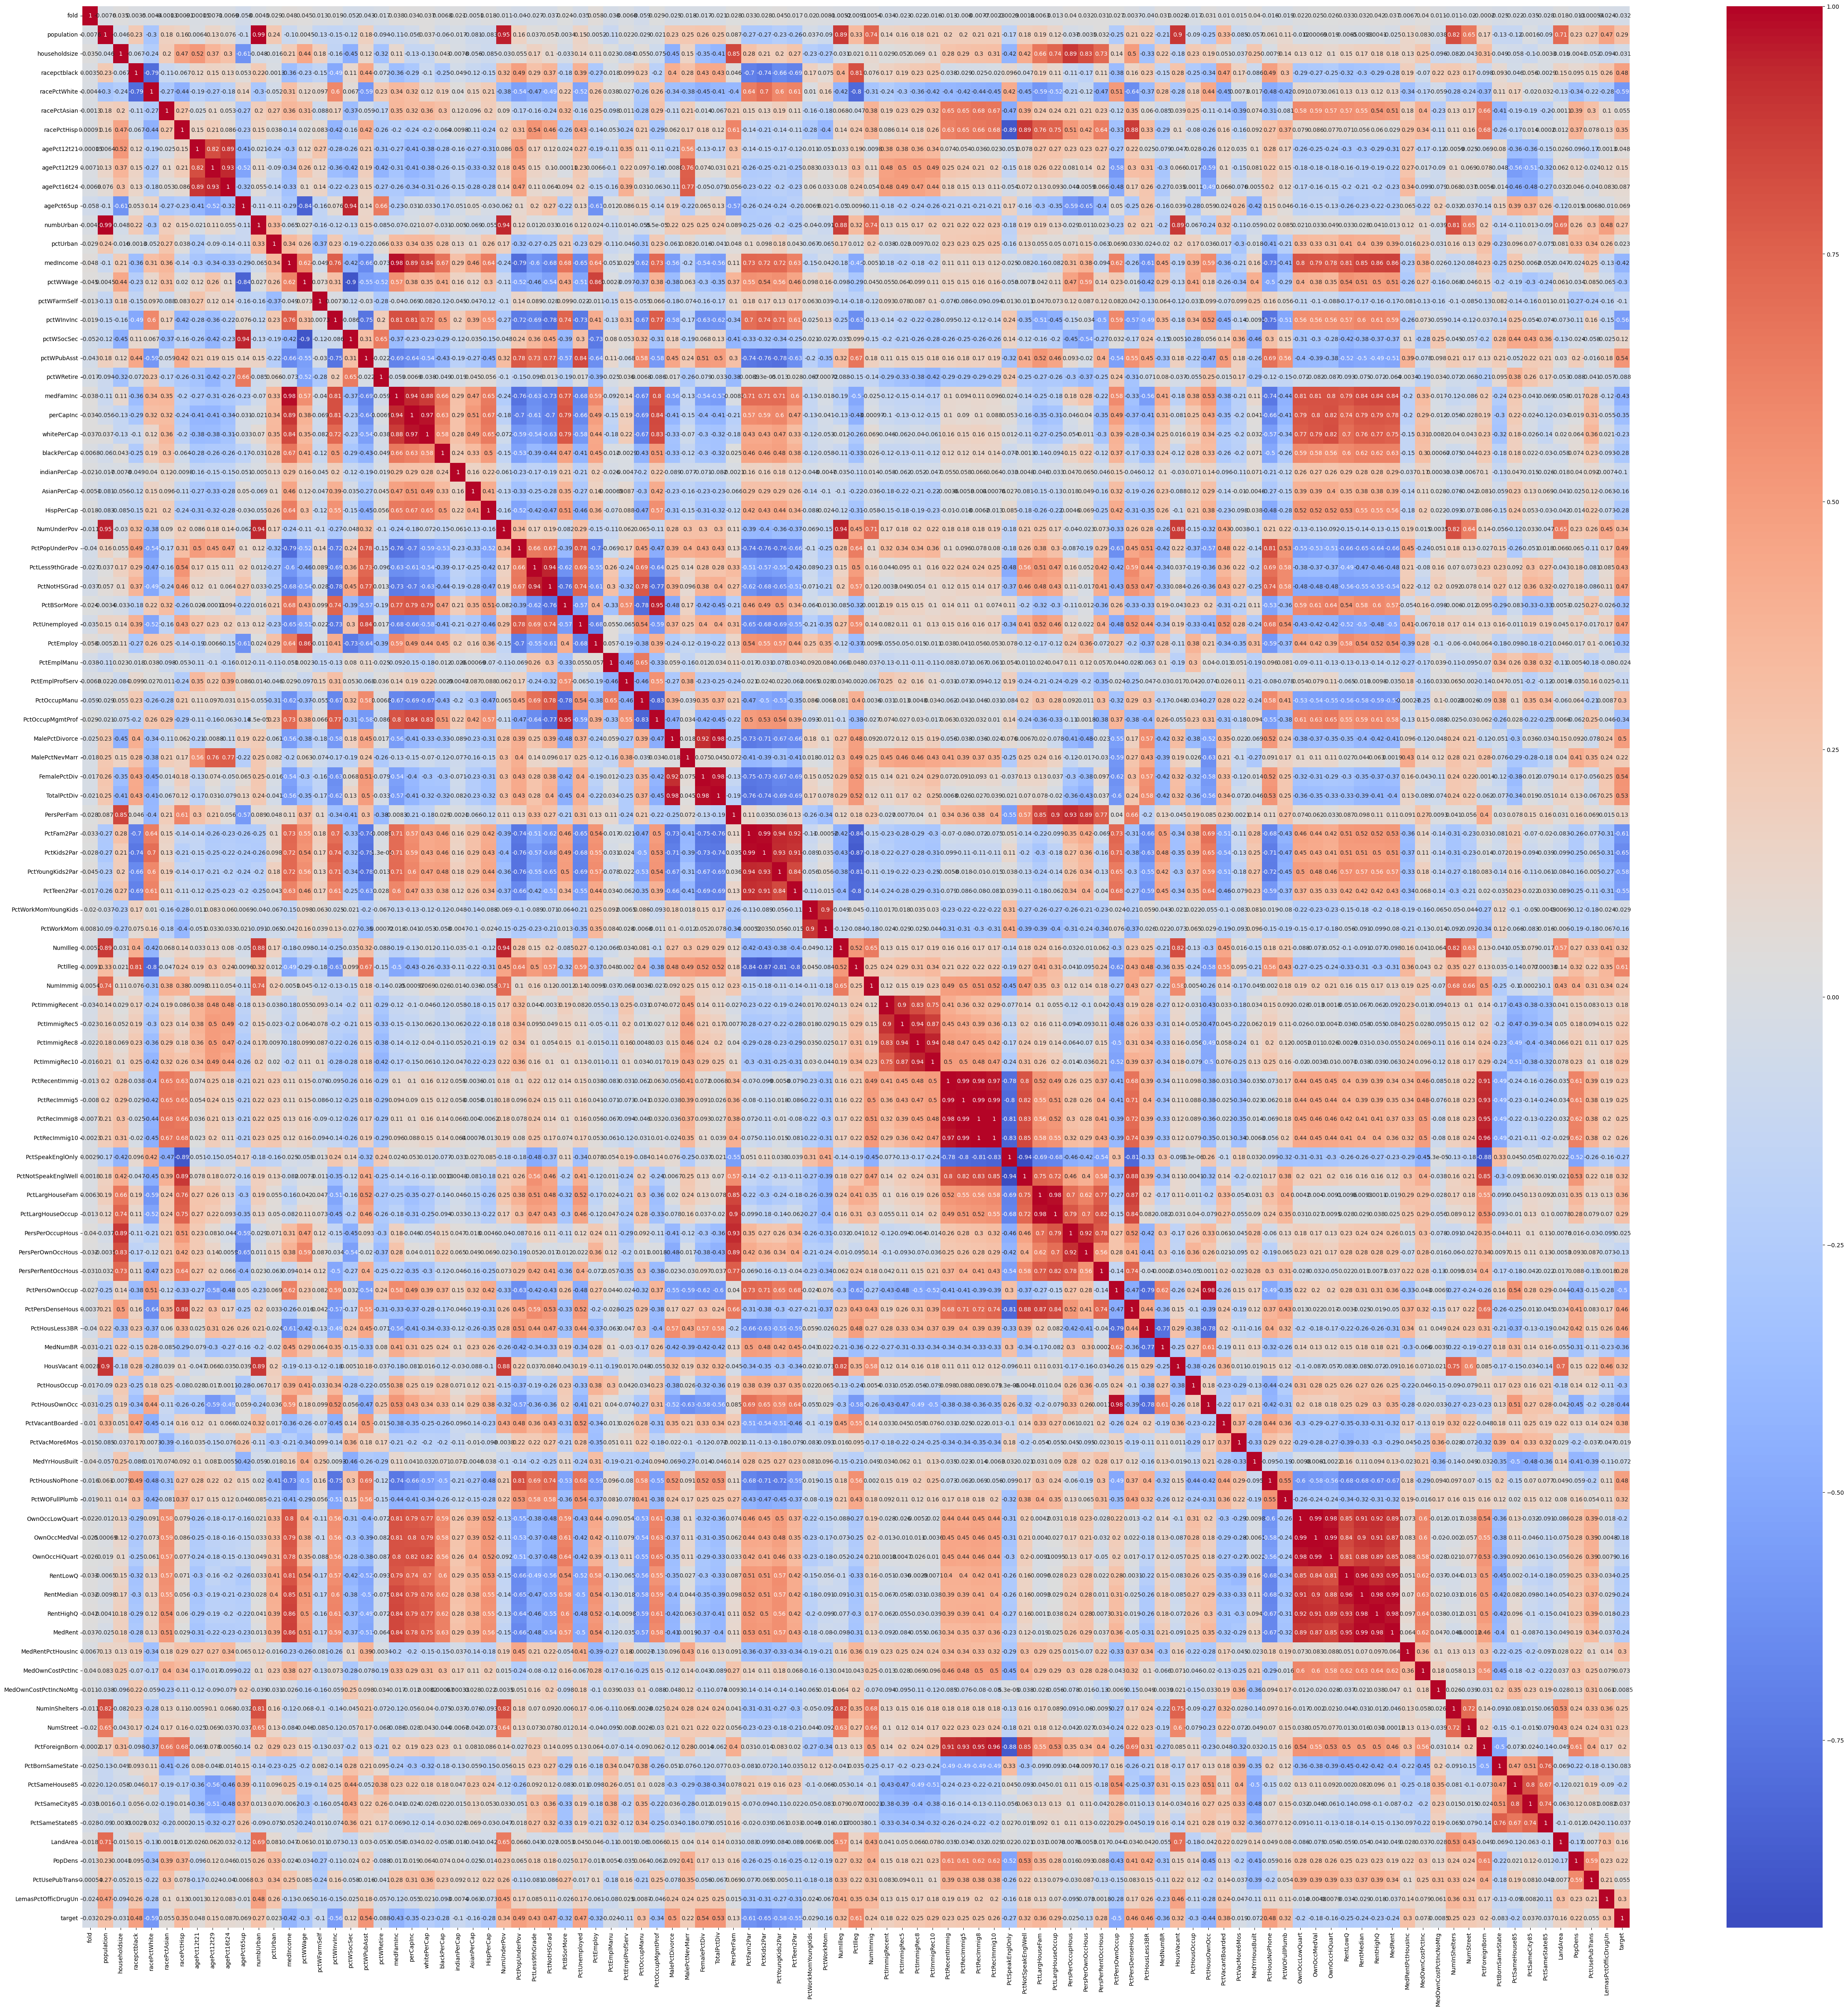

In [7]:
# make corr heatmap
plt.figure(figsize=(60, 60))
sns.heatmap(communities.corr(), annot=True, cmap="coolwarm")
plt.show()

# !todo communities 

# diabetes

In [3]:
diabetes = pd.read_csv(
    "https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/diabetes.csv?token=GHSAT0AAAAAACIBN356XRNGJJVJ7RS32QUEZP3IM4A"
)

In [6]:
diabetes.rename(columns={"y": "target"}, inplace=True)

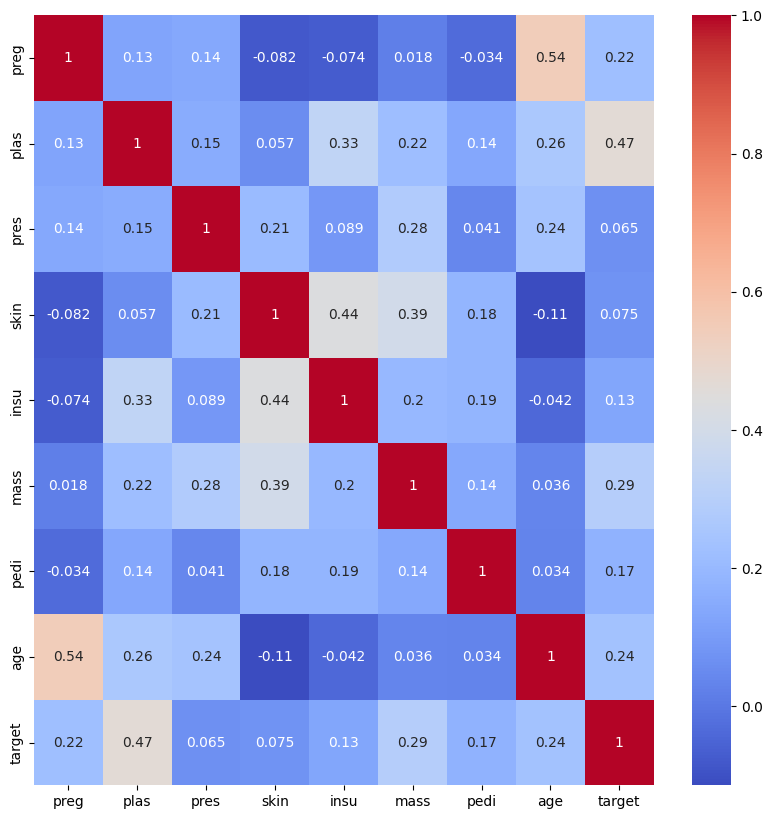

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")
plt.show()

In [8]:
diabetes.to_csv("data/diabetes.csv", index=False)

# Dry bean

In [9]:
dry_bean = pd.read_csv("https://raw.githubusercontent.com/Fersoil/logistic_regression/preprocessing_data/data/dry_bean.csv?token=GHSAT0AAAAAACIBN35776DDSKBR5TKI3LTQZP3IQOA")

In [11]:
dry_bean
dry_bean.rename(columns={"y": "target"}, inplace=True)

In [12]:
dry_bean

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation   
0      28395    610.291       208.178117       173.888747      1.197191  \
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness   
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027  \
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4   
0         0.913358      0.007332      0.003147      0.834222      0.998724  \
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       target  
0           1  
1           1  
2           1  
3           1  
4           1  
...       ...  
13606       1  
13607       1  
13608       1  
13609       1  
13610       1  

[13611 rows x 17 columns]

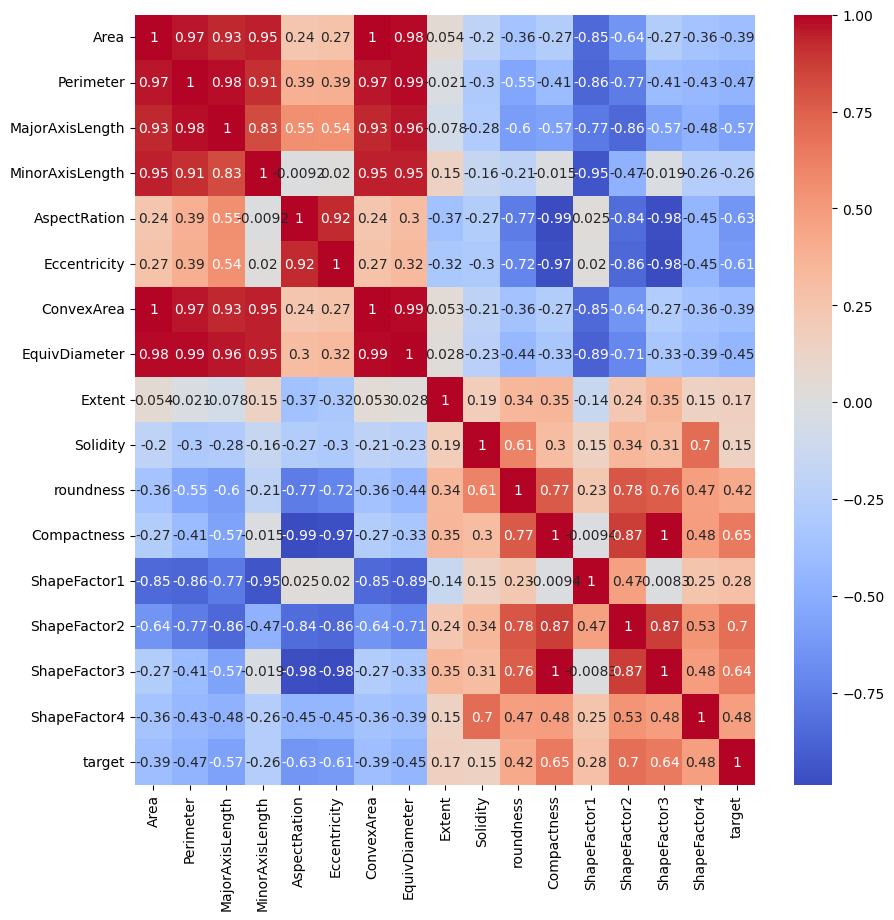

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(dry_bean.corr(), annot=True, cmap="coolwarm")
plt.show()